# Bayesian Optimization

According to Wikipedia "Bayesian optimization is a sequential design strategy for global optimization of black-box functions that doesn't require derivatives."

We call this black-box function the **objective function**. We also use a **surrogate function** to estimate the objective function. The surrogate function consumes known points calculated by objective function and fit mean and standard deviation of the objective function.

Thus, we can use the surrogate function to find the next point to explore. How do we find the next point? We use an **acquisition function**.

We do all of this inside the **search space**.

The whole process:

0. Initiate x with the min and max of the search space.
1. Calculate y using x and objective function.
2. Fit the surrogate function.
3. Find new x using acquisition function.
4. Goto 1

The surrogate function is usually the gussian process, and this is also what we use here.

The acquisition function has several options: 

1. Probability of Improvement (PI).
2. Expected Improvement (EI).
3. Upper/Lower Confidence Bound (LCB/UCB).

Here we use UCB.

$$a_{ucb}(x;\beta) =\mu(x) + \beta\sigma(x)$$

$\beta$ is the weight we can adjust. It simply means which one is more important. It determines which we value the more, *exploitation* or *exploration*.


In [1]:
# example of a gaussian process surrogate function
import math
import numpy as np
from matplotlib import pyplot as plt
from warnings import catch_warnings
from warnings import simplefilter
from sklearn.gaussian_process import GaussianProcessRegressor

In [2]:
# objective function
def objective(x):
    return ((x-0.47)**2 * math.sin(3 * x))

#uppper confidence bound
#beta = 1
def acquisition(X, surrogate):
    yhat, std = surrogate.predict(X, return_std=True)
    yhat=yhat.flatten()
    upper=yhat+std
    max_at=np.argmax(upper)
    return X[max_at]

surrogate = GaussianProcessRegressor()

def plot(X, y, xsamples, ysamples, yhat, std, new_x, new_y, i):
    plt.figure(figsize=(12,6))
    plt.plot(X, y, label='real')
    
    plt.scatter(xsamples, ysamples, label='explored samples')
    plt.plot(X, yhat, label='gussian process - mean', c='g')
    plt.plot(X, yhat+std, label='gussian process - upper/lower bound',c='g',linestyle='--',)
    plt.plot(X, yhat-std, c='g',linestyle='--',)
    plt.scatter([new_x], [new_y], label='next sample', c='r')
    plt.legend()
    plt.title(f'Iteration {i}')
    plt.show()

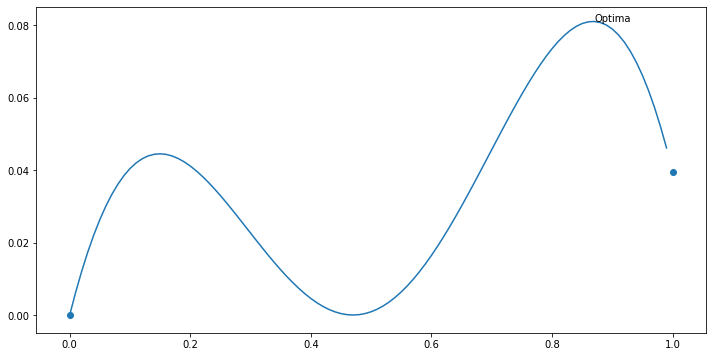

In [3]:
# grid-based sample of the domain [0,1]
X = np.arange(0, 1, 0.01)
X = X.reshape(-1,1)
# sample the domain without noise
y = np.array([objective(x) for x in X])
y = y.reshape(-1,1)
# sample the domain with noise
ynoise = [objective(x) for x in X]
# find best result
ix = np.argmax(y)
xsamples=np.array([[0],[1]])
ysamples=np.array([objective(x) for x in xsamples])
plt.figure(figsize=(12,6))
plt.plot(X, y)
plt.annotate('Optima',(X[ix], y[ix]))
plt.scatter(xsamples, ysamples)
plt.show()

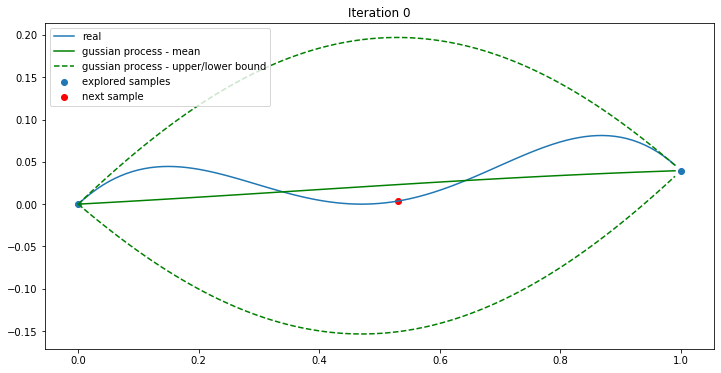

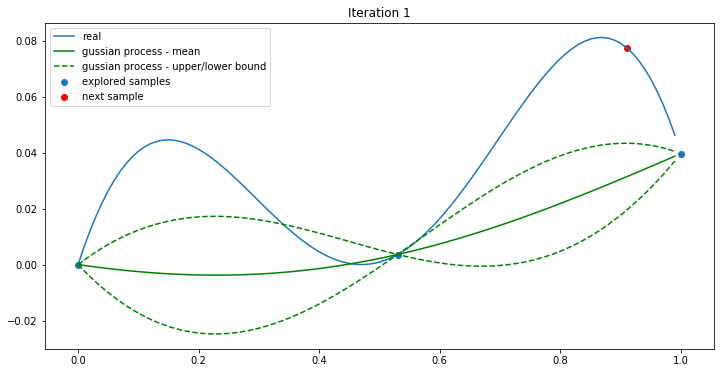

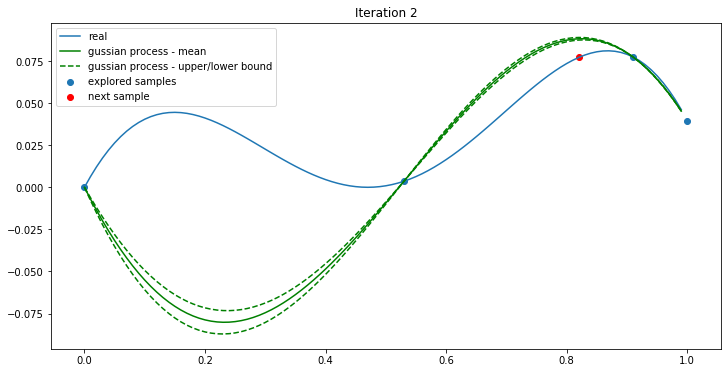

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:362: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:362: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


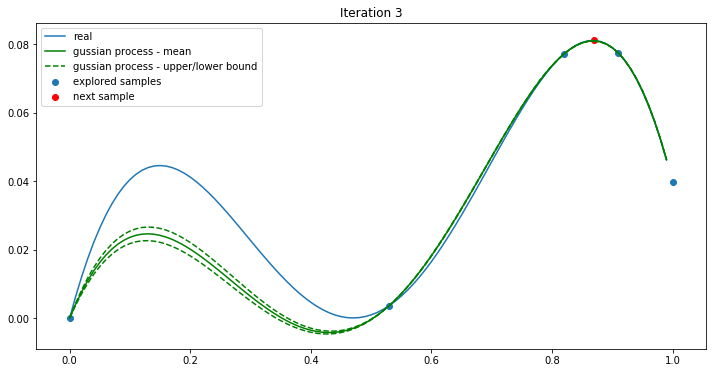

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:362: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:362: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


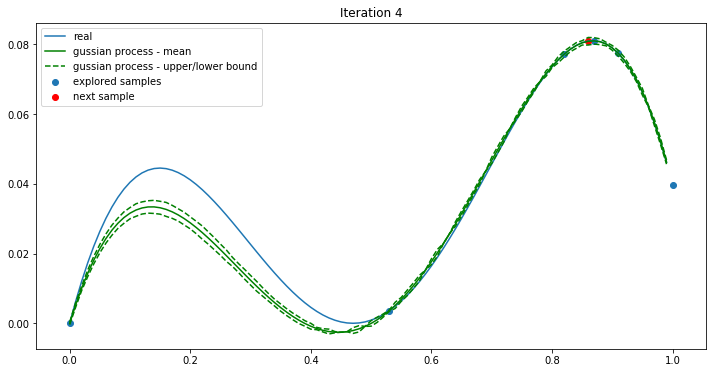

In [4]:

for i in range(5):
    #X=X.reshape(-1,1)
    #xsamples=xsamples.reshape(-1, 1)
    #ysamples=ysamples.reshape(-1, 1)
    #step 1 update the surrogate function
    surrogate.fit(xsamples, ysamples)
    yhat, std=surrogate.predict(X, return_std=True)
    std=std.reshape(-1,1)
    yhat=yhat.reshape(-1,1)
    #step
    new_x=acquisition(X, surrogate)
    new_y=objective(new_x)

    plot(X, y, xsamples, ysamples, yhat, std, new_x, new_y, i)
    #print(f'max y is {max(ysamples.flatten())}')
    xsamples=np.vstack((xsamples, new_x))
    ysamples=np.vstack((ysamples, new_y))


In [5]:
max(ysamples)

array([0.0811051])

# Bayesian Optimization using Hyperopt

The above code is only used to demonstate the algorithm. In daily work, we use tools like Hyperopt.

In [6]:
from hyperopt import fmin, tpe, hp
best = fmin(
    fn=lambda x:-objective(x),
    space=hp.uniform('x', 0, 1),
    algo=tpe.suggest,
    max_evals=100)
print(best)

100%|███████████████████████████████████████████| 100/100 [00:00<00:00, 487.66trial/s, best loss: -0.08111315186238663]
{'x': 0.8684895205673332}


In [7]:
objective(0.8677763535516424)

0.08111392201180685